<a href="https://colab.research.google.com/github/llskyhi/109-2_BigDataProgramming/blob/main/0330_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
install.packages(
  c(
    "rJava",
    "jiebaR",
    "tmcn",
    "dplyr",
    "lubridate",
    "stringr",
    "wordcloud",
    "showtext"
  )
)
install.packages(
  "Rwordseg",
  repos="http://R-Forge.R-project.org"
)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘HMM’ is not available”
Warning message in install.packages("Rwordseg", repos = "http://R-Forge.R-project.org"):
“installation of package ‘Rwordseg’ had non-zero exit status”


In [39]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud)
library(showtext)
showtext_auto(enable = T)

In [72]:
content <- 
"嚴重特殊傳染性肺炎疫情持續在全球蔓延，已造成三千多萬⼈感染，死亡人數破百萬人，歐美醫療體系幾近崩潰，各種行動限制對於各國之經濟更有莫大之衝擊。
然而台灣未實行大規模封鎖行動，維持正常上班上課與各種經濟活動，至今無大規模疫情爆發，醫療體系也仍能正常提供民眾服務，顯⽰台灣的防疫政策正確而有效，獲得世界各國高度肯定。
國家衛生研究院群體健康科學研究所與感染症與疫苗研究所合作，利用真實數據與數學模型證實，良好的邊境管控，詳盡的疫情調查，確實的隔離與檢疫，以及民眾遵行防疫措施，為台灣抗疫四大支柱。
台灣也對世界各國提供各項協助與經驗分享，期望幫助各國盡快從疫情的陰霾中走出。"
content <- str_remove_all(content, "[0-9a-zA-Z]+")
cutter <- worker(bylines = F)
cutter[content]

[1] "嚴重"           "特殊"           "傳染性"         "肺炎"          
  [5] "疫情"           "持續"           "在"             "全球"          
  [9] "蔓延"           "已"             "造成"           "三千多萬"      
 [13] "⼈"             "感染"           "死亡"           "人數"          
 [17] "破"             "百萬"           "人"             "歐美"          
 [21] "醫療"           "體系"           "幾近"           "崩潰"          
 [25] "各種"           "行動"           "限制"           "對於"          
 [29] "各國"           "之"             "經濟"           "更"            
 [33] "有"             "莫大"           "之"             "衝擊"          
 [37] "然而"           "台灣"           "未"             "實行"          
 [41] "大規模"         "封鎖"           "行動"           "維持"          
 [45] "正常"           "上班"           "上課"           "與"            
 [49] "各種"           "經濟"           "活動"           "至今"          
 [53] "無"             "大規模"         "疫情"           "爆發"          
 [57] "醫療"           "體系"           "也"             "仍"            
 [61] "能"             "正常"           "提供"           "民眾"          
 [65] "服務"           "顯"             "⽰"             "台"            
 [69] "灣"             "的"             "防疫"           "政策"          
 [73] "正確"           "而"             "有效"           "獲得"          
 [77] "世界"           "各國"           "高度肯定"       "國家衛生研究院"
 [81] "群體"           "健康"           "科學"           "研究所"        
 [85] "與"             "感染"           "症"             "與"            
 [89] "疫苗"           "研究所"         "合作"           "利用"          
 [93] "真實"           "數據"           "與"             "數學模型"      
 [97] "證實"           "良好"           "的"             "邊境"          
[101] "管控"           "詳盡"           "的"             "疫情"          
[105] "調查"           "確實"           "的"             "隔離"          
[109] "與"             "檢疫"           "以及"           "民眾"          
[113] "遵行"           "防疫"           "措施"           "為"            
[117] "台灣"           "抗疫"           "四大"           "支柱"          
[121] "台灣"           "也"             "對"             "世界"          
[125] "各國"           "提供"           "各項"           "協助"          
[129] "與"             "經驗"           "分享"           "期望"          
[133] "幫助"           "各國"           "盡快"           "從"            
[137] "疫情"           "的"             "陰霾"           "中"            
[141] "走出"

In [73]:
new.words <- c("傳染性肺炎", "醫療體系", "防疫措施", "台灣", "臺灣")
#for(i in 1:length(new.words)){
#  new_user_word(cutter, new.words[i])
#}
writeLines(new.words, "new_words.txt")
stop.words <- c("在", "之", "更", "個", "未", "而", "也", "與", "的")
writeLines(stop.words, "stop_words.txt")

cutter <- worker(
  user = "new_words.txt",
  stop_word = "stop_words.txt",
  bylines = F
)
seg.words <- cutter[content]
#seg.words
word.freq <- freq(seg.words)
word.freq <- arrange(word.freq, desc(freq))
head(word.freq, 10)

,char,freq
,<chr>,<dbl>
1,各國,4
2,疫情,4
3,台灣,4
4,行動,2
5,各種,2
6,經濟,2
7,大規模,2
8,醫療體系,2
9,研究所,2


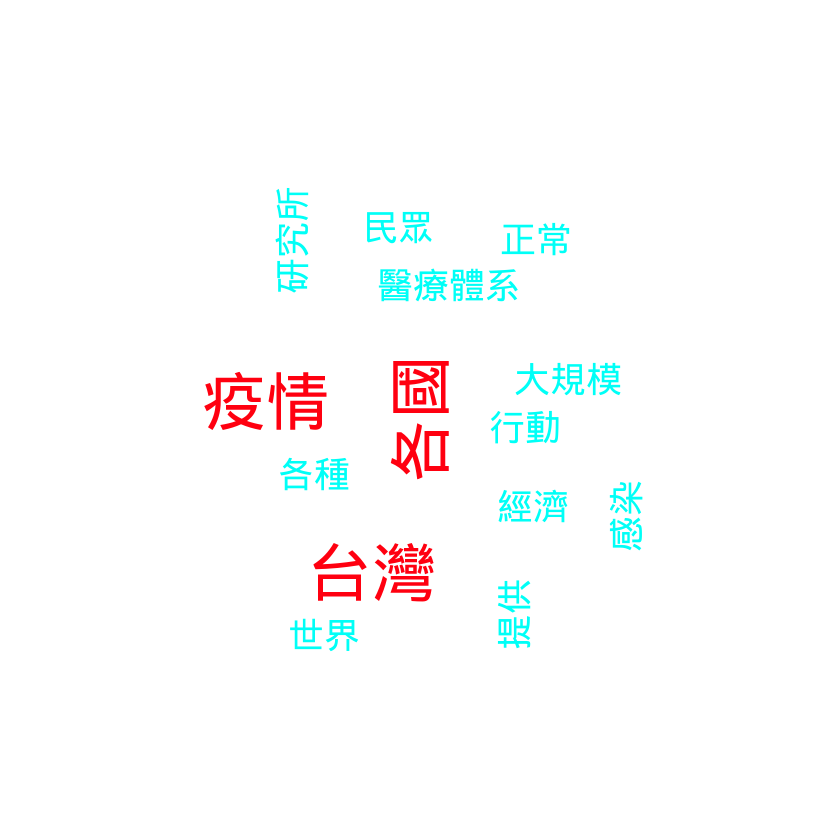

In [74]:
#par(family = ("Microsoft YaHei"))
par(family = ("wqy-microhei"))

wordcloud(
  word.freq$char,
  word.freq$freq,
  min.freq = 2,
  random.order = F,
  ordered.colors = F,
  colors = rainbow(nrow(word.freq))
)